# Predicting World Happiness Rankings 

#### Garda Ramadhito
#### 2/8/2021



In this project, I explore the factors that predict the level of happiness in a country, including GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, and perceptions of corruption, in addition to the country itself and the region it is located in. I used data from the United Nations' World Happiness Report from 2015 to 2019 (instead of just from 2019). After feature selection using penalized logistic regression, I found that tree-based machine learning models work better than deep learning models. Specifically, the Gradient Boosting Classifier has the highest accuracy compared to the Random Forest Classifier and Feed-Forward Neural Networks.

This notebook can be found in this GitHub repo [here](https://github.com/mramadhito/World-Happiness-Report-2015-2019).

---

**Data**: 2015-2019 World Happiness Report Data

**Features**
*   Country 
*   Region
*   GDP per capita
*   Social support
*   Healthy life expectancy
*   Freedom to make life choices
*   Generosity
*   Perceptions of corruption

**Target**
*   Happiness_level (Very High = Top 20% and Very Low = Bottom 20%)

Source: https://worldhappiness.report/




# Import the data




In [ ]:
!pip install scikit-learn --upgrade 
import os
os.environ['TF_KERAS'] = '1'
% tensorflow_version 1

     |████████████████████████████████| 22.2MB 1.7MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [ ]:
! pip install aimodelshare --upgrade --extra-index-url https://test.pypi.org/simple/ 

Looking in indexes: https://pypi.org/simple, https://test.pypi.org/simple/
     |████████████████████████████████| 51kB 2.4MB/s 
     |████████████████████████████████| 9.0MB 4.2MB/s 
     |████████████████████████████████| 194kB 12.2MB/s 
     |████████████████████████████████| 4.1MB 21.4MB/s 
     |████████████████████████████████| 102kB 8.8MB/s 
     |████████████████████████████████| 133kB 36.2MB/s 
     |████████████████████████████████| 7.2MB 48.8MB/s 
     |████████████████████████████████| 71kB 5.2MB/s 
     |████████████████████████████████| 92kB 6.8MB/s 
     |████████████████████████████████| 71kB 6.3MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115928 sha256=42bdcb72e73c35f183fc3582febfb9052640c2d9de7037ddbd520a562514832f
  Stored in directory: /root/.cache/pip/wheels/af/19/30/1ea0cad502dcb4e66ed5a690279628c827aea38bbbab75d5ed
Successfully built fire
ERROR: botocore 1.20.3 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 1.24.3 

In [320]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df=pd.read_csv("worldhappiness1519.csv")

df.head(10)

,Country or region,Happiness_level,year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,sub-region
0,Finland,Very High,2019,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Western Europe
1,Denmark,Very High,2019,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Western Europe
2,Norway,Very High,2019,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Western Europe
3,Iceland,Very High,2019,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Western Europe
4,Netherlands,Very High,2019,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Western Europe
5,Switzerland,Very High,2019,7.480,1.452,1.526,1.052,0.572,0.263,0.343,Western Europe
6,Sweden,Very High,2019,7.343,1.387,1.487,1.009,0.574,0.267,0.373,Western Europe
7,New Zealand,Very High,2019,7.307,1.303,1.557,1.026,0.585,0.330,0.380,North America and ANZ
8,Canada,Very High,2019,7.278,1.365,1.505,1.039,0.584,0.285,0.308,North America and ANZ
9,Austria,Very High,2019,7.246,1.376,1.475,1.016,0.532,0.244,0.226,Western Europe


In [321]:
# Clean up final region data
X = df.drop(['Happiness_level', 'year', 'Score'], axis=1)
y = df['Happiness_level']

X.shape, y.shape

((782, 8), (782,))

In [322]:
X.head(10)

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,sub-region
0,Finland,1.340,1.587,0.986,0.596,0.153,0.393,Western Europe
1,Denmark,1.383,1.573,0.996,0.592,0.252,0.410,Western Europe
2,Norway,1.488,1.582,1.028,0.603,0.271,0.341,Western Europe
3,Iceland,1.380,1.624,1.026,0.591,0.354,0.118,Western Europe
4,Netherlands,1.396,1.522,0.999,0.557,0.322,0.298,Western Europe
5,Switzerland,1.452,1.526,1.052,0.572,0.263,0.343,Western Europe
6,Sweden,1.387,1.487,1.009,0.574,0.267,0.373,Western Europe
7,New Zealand,1.303,1.557,1.026,0.585,0.330,0.380,North America and ANZ
8,Canada,1.365,1.505,1.039,0.584,0.285,0.308,North America and ANZ
9,Austria,1.376,1.475,1.016,0.532,0.244,0.226,Western Europe


In [323]:
# Set up training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=22)

print(X_train.shape)
print(y_train.shape)
print(X_train.columns.tolist())

(523, 8)
(523,)
['Country or region', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'sub-region']


## Preprocess data using Column Transformer

In [324]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# We create the preprocessing pipelines for both numeric and categorical data.

numeric_features=X.columns.tolist()
numeric_features.remove('Country or region')
numeric_features.remove('sub-region')

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Country or region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])



# final preprocessor object set up with ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


#Fit your preprocessor object
preprocess=preprocessor.fit(X_train) 


In [325]:
# Write function to transform data with preprocessor

def preprocessor(data):
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

In [326]:
# Check shape for keras input:
preprocessor(X_train).shape 

(523, 183)

In [327]:
# Check shape for keras output:
pd.get_dummies(y_train)

,Average,High,Low,Very High,Very Low
163,0,0,0,1,0
196,0,1,0,0,0
714,1,0,0,0,0
305,0,0,0,0,1
39,0,1,0,0,0
...,...,...,...,...,...
491,0,0,0,1,0
502,0,1,0,0,0
358,0,1,0,0,0
356,0,1,0,0,0


## Exploratory Data Analysis (Bivariate Analyses)

In [328]:
import matplotlib as mpl
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Happiness Score and GDP per Capita')

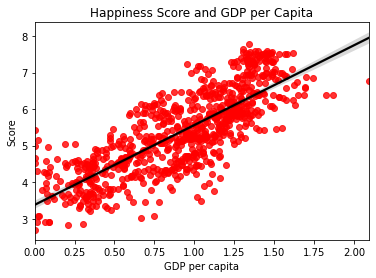

In [329]:
from matplotlib import pyplot as plt

x = df['GDP per capita']
y = df['Score']

sns.regplot(x, y, scatter_kws={"color": "red"}, line_kws={"color": "black"})
plt.title("Happiness Score and GDP per Capita")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Happiness Score and Social Support')

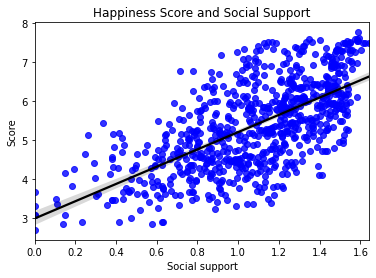

In [330]:
from matplotlib import pyplot as plt

x = df['Social support']
y = df['Score']

sns.regplot(x, y, scatter_kws={"color": "blue"}, line_kws={"color": "black"})
plt.title("Happiness Score and Social Support")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Happiness Score and Perceptions of Corruption')

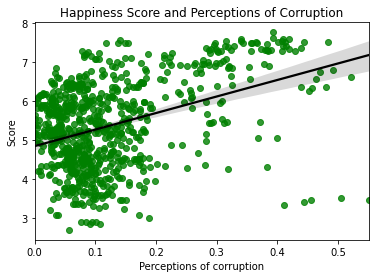

In [331]:
from matplotlib import pyplot as plt

x = df['Perceptions of corruption']
y = df['Score']

sns.regplot(x, y, scatter_kws={"color": "green"}, line_kws={"color": "black"})
plt.title("Happiness Score and Perceptions of Corruption")

From the plots above, it looks like all three features -- GDP per Capita, Social Support, and Perceptions of Corruption -- are positively correlated with the Happiness Score. GDP per Capita and Social Support specifically are strong predictors of the Happiness Score throughout the range of the independent variables. The regression line for Perceptions of Corruption have a higher level of uncertainty at higher values of the variable but the variable remains a strong predictor at lower values of the independent variable.

## Feature Selection

In [332]:
#Penalized Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

model1 = LogisticRegression(C=1, penalty='l1', solver='liblinear').fit(preprocessor(X_train), y_train)
sel1 = SelectFromModel(model1, prefit = True)

X_train_new = sel1.transform(preprocessor(X_train))
X_test_new = sel1.transform(preprocessor(X_test))

print(model1.coef_)

[[-0.23861292  0.0643594   0.06565319 -0.13146483 -0.01651567 -0.23926245
   0.         -0.2985153   1.07859433  0.          0.         -0.13507804
   0.          0.          1.22597457  0.          0.          0.85795854
   0.          0.          0.          0.          0.          0.
   0.          0.         -0.46287539  0.          0.          0.
   0.          0.          0.          0.          0.          2.76767793
   0.          0.          0.          0.          0.          1.19575771
   1.45490767  0.          0.          2.64639158  0.          0.
   0.          1.22030184  0.          0.          0.          0.
   0.          0.          0.          1.46671773  0.          0.
   0.          0.22509709  2.92624463  0.          0.          0.
   0.          1.30433143  0.          0.          0.          0.
   0.          0.          1.6798815   0.          2.59892562  0.
   0.          0.71129659  0.          0.57571991  0.          0.
   2.32032372  0.          0.       

In [333]:
print(X_train_new.shape)

(523, 114)


In [334]:
print(X_test_new.shape)

(259, 114)


The number of features decreased from 183 to 114. We can infer that the numeric features are important as the non-zero values are located in the middle of the matrix. As for the categorical variables, some countries and regions might not be good predictors of happiness levels hence the many zero values at the top and bottom of the matrix.

## Model 1: Feed-forward neural network

In [335]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras
from keras.optimizers import SGD
FFNN1 = Sequential()
FFNN1.add(Dense(128, input_shape=(114,), activation='relu'))
FFNN1.add(Dense(64, activation='relu'))
FFNN1.add(Dense(64, activation='relu'))
FFNN1.add(Dense(5, activation='softmax')) 
                                            
# Compile model
FFNN1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
FFNN1.fit(X_train_new, pd.get_dummies(y_train), 
               batch_size = 60, 
               epochs = 300, validation_split=0.35)  



Train on 339 samples, validate on 184 samples
Epoch 1/300
339/339 [==============================] - 0s 720us/step - loss: 1.6102 - accuracy: 0.3097 - val_loss: 1.5889 - val_accuracy: 0.3098
Epoch 2/300
339/339 [==============================] - 0s 80us/step - loss: 1.6019 - accuracy: 0.3274 - val_loss: 1.5810 - val_accuracy: 0.3207
Epoch 3/300
339/339 [==============================] - 0s 67us/step - loss: 1.5936 - accuracy: 0.3510 - val_loss: 1.5730 - val_accuracy: 0.3370
Epoch 4/300
339/339 [==============================] - 0s 85us/step - loss: 1.5853 - accuracy: 0.3628 - val_loss: 1.5650 - val_accuracy: 0.3533
Epoch 5/300
339/339 [==============================] - 0s 77us/step - loss: 1.5770 - accuracy: 0.3658 - val_loss: 1.5568 - val_accuracy: 0.3587
Epoch 6/300
339/339 [==============================] - 0s 84us/step - loss: 1.5686 - accuracy: 0.3717 - val_loss: 1.5487 - val_accuracy: 0.3587
Epoch 7/300
339/339 [==============================] - 0s 71us/step - loss: 1.5603 - accu

In [336]:
print(FFNN1.predict_classes(X_test_new))

prediction_index1=FFNN1.predict_classes(X_test_new)

labels1=pd.get_dummies(y_train).columns

# Map indices

predicted_labels1=list(map(lambda x: labels1[x], prediction_index1))
print(predicted_labels1)


[4 0 1 2 2 4 1 2 1 1 1 1 1 3 3 1 2 4 1 0 4 3 2 4 3 1 0 2 3 3 1 1 3 3 2 0 2
 0 3 2 2 4 2 3 2 4 4 0 2 2 3 4 1 0 3 1 2 3 1 4 0 1 1 3 1 4 2 4 4 1 4 1 4 4
 1 0 2 4 0 1 2 2 2 4 1 1 0 2 3 1 4 0 4 4 1 3 3 4 3 2 3 4 0 4 2 4 3 0 4 4 2
 2 2 4 3 3 0 3 3 0 1 4 0 2 2 2 1 0 3 1 3 0 4 1 4 0 0 3 2 4 3 2 3 2 3 0 1 2
 0 1 4 2 4 1 3 4 1 0 2 3 4 4 3 4 4 4 4 4 0 4 0 2 1 2 0 4 3 0 0 3 3 2 2 4 1
 1 4 3 0 1 4 1 2 2 3 3 2 0 3 1 1 1 0 0 4 1 2 0 0 0 4 3 4 2 2 2 4 4 1 3 0 3
 1 4 3 1 3 2 3 1 1 1 3 0 3 0 1 1 1 2 2 1 2 3 4 1 1 4 2 1 4 1 3 1 0 1 0 1 0]
['Very Low', 'Average', 'High', 'Low', 'Low', 'Very Low', 'High', 'Low', 'High', 'High', 'High', 'High', 'High', 'Very High', 'Very High', 'High', 'Low', 'Very Low', 'High', 'Average', 'Very Low', 'Very High', 'Low', 'Very Low', 'Very High', 'High', 'Average', 'Low', 'Very High', 'Very High', 'High', 'High', 'Very High', 'Very High', 'Low', 'Average', 'Low', 'Average', 'Very High', 'Low', 'Low', 'Very Low', 'Low', 'Very High', 'Low', 'Very Low', 'Very Low', 'Average', '

In [337]:
# Evaluate held out test data
from sklearn.metrics import accuracy_score

print("Feed-forward Neural Network's Test-Data prediction accuracy: {}".format(accuracy_score(y_test, predicted_labels1)))

Feed-forward Neural Network's Test-Data prediction accuracy: 0.6332046332046332


## Model 2: Random Forest Classifier

In [338]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid1 = {'n_estimators': np.arange(10, 200, 10)} 

grid1 = GridSearchCV(RandomForestClassifier(), param_grid=param_grid1, cv=10)

grid1.fit(X_train_new, y_train)

print("best mean cross-validation score: {}".format(grid1.best_score_))
print("best parameters: {}".format(grid1.best_params_))
print("test-set score: {}".format(grid1.score(X_test_new, y_test)))

best mean cross-validation score: 0.7402031930333817
best parameters: {'n_estimators': 140}
test-set score: 0.7413127413127413


In [340]:
#Choose n_estimators = 150

RFC1 = RandomForestClassifier(n_estimators = 140)
RFC1.fit(X_train_new, y_train)

RandomForestClassifier(n_estimators=140)

In [341]:
from sklearn import metrics
from numpy import loadtxt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

print("Random Forest Classifier's cross validation accuracy:", np.mean(cross_val_score(RFC1, X_train_new, y_train, cv=10)))
print("Random Forest Classifier's Test-Data prediction accuracy: {}".format(RFC1.score(X_test_new, y_test)))

Random Forest Classifier's cross validation accuracy: 0.7324383164005805
Random Forest Classifier's Test-Data prediction accuracy: 0.7451737451737451


In [342]:
predicted_labels2=RFC1.predict(X_test_new)

print(predicted_labels2)

['Very Low' 'Average' 'High' 'Low' 'Low' 'Very Low' 'High' 'Low' 'Average'
 'Average' 'Average' 'High' 'Average' 'Very High' 'Very High' 'Average'
 'Low' 'Very Low' 'Low' 'Low' 'Very Low' 'Very High' 'Very Low' 'Very Low'
 'High' 'Average' 'Low' 'Very Low' 'Very High' 'Very High' 'High'
 'Average' 'Very High' 'Very High' 'Very Low' 'Average' 'Low' 'Average'
 'High' 'Low' 'Low' 'Very Low' 'Low' 'Very High' 'Low' 'Very Low'
 'Very Low' 'Low' 'Low' 'Average' 'Very High' 'Very Low' 'Average'
 'Average' 'High' 'High' 'Very Low' 'Very High' 'High' 'Very Low'
 'Average' 'Average' 'High' 'High' 'High' 'Very Low' 'Average' 'Very Low'
 'Very Low' 'High' 'Very Low' 'High' 'Very Low' 'Very Low' 'High'
 'Average' 'Very Low' 'Very Low' 'Average' 'High' 'Low' 'Very Low'
 'Average' 'Very Low' 'High' 'High' 'Low' 'Very Low' 'Very High' 'High'
 'Very Low' 'Average' 'Average' 'Average' 'High' 'High' 'Very High'
 'Very Low' 'Very High' 'Low' 'Very High' 'Very Low' 'Average' 'Average'
 'Low' 'Very Low' 'Ve

## Model 3: Gradient Boosting Classifier

In [394]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid2 = {"n_estimators": np.arange(20,400,20)}

grid2 = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid2, cv=10)

grid2.fit(X_train_new, y_train)

print("best mean cross-validation score: {}".format(grid2.best_score_))
print("best parameters: {}".format(grid2.best_params_))
print("test-set score: {}".format(grid2.score(X_test_new, y_test)))

best mean cross-validation score: 0.7554063860667635
best parameters: {'n_estimators': 300}
test-set score: 0.7297297297297297


In [395]:
#Choose n_estimators = 300

GBC1 = GradientBoostingClassifier(n_estimators = 300)
GBC1.fit(X_train_new, y_train)

GradientBoostingClassifier(n_estimators=300)

In [396]:
print("Gradient Boosting Classifier's cross validation accuracy:", np.mean(cross_val_score(GBC1, X_train_new, y_train, cv=10)))
print("Gradient Boosting Classifier's Test-Data prediction accuracy: {}".format(GBC1.score(X_test_new, y_test)))

Gradient Boosting Classifier's cross validation accuracy: 0.7457910014513788
Gradient Boosting Classifier's Test-Data prediction accuracy: 0.7258687258687259


In [397]:
predicted_labels3=list(GBC1.predict(X_test_new))

print(list(predicted_labels3))

['Very Low', 'Average', 'High', 'Low', 'Low', 'Very Low', 'High', 'Very Low', 'Very High', 'High', 'Average', 'High', 'High', 'Very High', 'Very High', 'Average', 'Low', 'Very Low', 'Low', 'Low', 'Very Low', 'Very High', 'Very Low', 'Low', 'High', 'Average', 'Low', 'Low', 'Very High', 'Very High', 'High', 'Average', 'Very High', 'Very High', 'Very Low', 'Average', 'Low', 'Average', 'High', 'Very Low', 'Low', 'Very Low', 'Very Low', 'Very High', 'Very Low', 'Very Low', 'Very Low', 'Low', 'Low', 'Average', 'Very High', 'Average', 'Average', 'Average', 'High', 'High', 'Low', 'Very High', 'High', 'Very Low', 'Average', 'Average', 'High', 'High', 'Very High', 'Very Low', 'Average', 'Very Low', 'Very Low', 'Average', 'Very Low', 'High', 'Very Low', 'Very Low', 'High', 'Average', 'Very Low', 'Very Low', 'Average', 'High', 'Low', 'Low', 'Average', 'Low', 'High', 'High', 'Low', 'Very Low', 'Very High', 'Average', 'Very Low', 'High', 'Average', 'Average', 'High', 'High', 'Very High', 'Very Low',

Comparing the models above, the Random Forest Classifier has the highest accuracy score at 74.5%. The next most accurate model is the Gradient Boosting Classifier with an accuracy score of 72.6%. The least accurate model of the three I ran was the feed-forward neural networks, which has an accuracy score of 63.3%, significantly lower than the tree-based models. Based on the GridSearchCV I ran, the best hyper-parameter values for a successful tree-based model are large enough number of estimators (n_estimators > 100). In the best model case, the number of estimators is set to 140.

For further steps to improve the accuracy of a predictive model, I suggest a tree-based model with further hyper-parameter tuning, especially the Gradient Boosting Classifier which has other hyper-parameters such as maximum depth of a tree, learning rate and loss. However, upon comparing with models I ran during class, there is a dramatic improvement in accuracy this time; I attribute this to the inclusion of observation from previous years. As such, more data from previous years can further improve model performance. Inclusion of other country-level features from other datasets might also contribute to further improvement in performance.

## Save preprocessor fxn to "preprocessor.zip"

In [378]:
#Save preprocessor function to local "preprocessor.zip" file for leaderboard submission
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"")

In [379]:
#test your preprocessor
prep=ai.import_preprocessor("preprocessor.zip")
prep(X_test)

<259x183 sparse matrix of type '<class 'numpy.float64'>'
	with 2068 stored elements in Compressed Sparse Row format>

## Save Random Forest Classifier model to onnx file

In [399]:
X_test_new.shape

(259, 114)

In [403]:
# Save sklearn model to onnx file
import aimodelshare as ai
from aimodelshare.aimsonnx import model_to_onnx

# Change numeric value in FloatTensorType to update
from skl2onnx.common.data_types import FloatTensorType
initial_type = [('float_input', FloatTensorType([None, 114]))]

# transform sklearn model to ONNX
onnx_model_RFC1 = model_to_onnx(RFC1, framework='sklearn', 
                                   initial_types=initial_type,                  
                                   transfer_learning=False,
                                   deep_learning=False,
                                   task_type='classification')

# Save model to local .onnx file
with open("onnx_model_RFC1.onnx", "wb") as f:
    f.write(onnx_model_RFC1.SerializeToString())

# Submit model to World Happiness Leaderboard


In [404]:
import aimodelshare as ai

#aimodelshare username and password
username = "-----"
password = "-----"

# load submit model creds (only gives access to s3 bucket)
# Load from pkl file
import pickle
with open("aws_creds_worldhappiness.pkl", 'rb') as file:
    aws_key,aws_password,region = pickle.load(file)

token=ai.aws.get_aws_token(username, password)
awscreds=ai.aws.get_aws_client(aws_key=aws_key, aws_secret=aws_password, aws_region=region)

In [406]:
# Submit_model() to leaderboard
ai.submit_model("onnx_model_RFC1.onnx",
                "https://z69mxrxdz5.execute-api.us-east-1.amazonaws.com/prod/m",
                token,awscreds,prediction_submission=predicted_labels_final,
                preprocessor="preprocessor.zip")

True

# Check the leaderboard

In [407]:
import pandas
data=ai.get_leaderboard("https://z69mxrxdz5.execute-api.us-east-1.amazonaws.com/prod/m",
                token,awscreds,verbose=2)

#get rid of any duplicate model submissions
#data=data.loc[data.iloc[:,0:8].duplicated()==False,:]
ai.stylize_leaderboard(data, category="classification")

,accuracy,f1_score,precision,recall,ml_framework,transfer_learning,deep_learning,model_type,depth,num_params,dense_layers,loss,optimizer,model_config,username,version
0,53.85%,53.24%,59.39%,55.03%,sklearn,nan,nan,SVC,nan,110.000000,nan,nan,nan,"{'C': 10, 'break_ties': False,...",prajseth,110
1,53.85%,53.24%,59.39%,55.03%,sklearn,nan,nan,SVC,nan,110.000000,nan,nan,nan,"{'C': 10, 'break_ties': False,...",prajseth,94
2,53.85%,53.24%,59.39%,55.03%,sklearn,nan,nan,SVC,nan,110.000000,nan,nan,nan,"{'C': 10, 'break_ties': False,...",prajseth,131
3,53.85%,53.24%,59.39%,55.03%,sklearn,nan,nan,SVC,nan,110.000000,nan,nan,nan,"{'C': 10, 'break_ties': False,...",prajseth,96
4,53.85%,53.24%,59.39%,55.03%,sklearn,nan,nan,SVC,nan,110.000000,nan,nan,nan,"{'C': 10, 'break_ties': False,...",prajseth,67
5,53.85%,53.24%,59.39%,55.03%,sklearn,nan,nan,SVC,nan,110.000000,nan,nan,nan,"{'C': 10, 'break_ties': False,...",prajseth,125
6,53.85%,53.24%,59.39%,55.03%,sklearn,nan,nan,SVC,nan,110.000000,nan,nan,nan,"{'C': 5, 'break_ties': False, ...",kka2120,90
7,51.92%,52.34%,56.79%,53.33%,keras,True,True,Sequential,4.000000,35205.000000,4.000000,str,SGD,"{'name': 'sequential_5', 'laye...",prajseth,15
8,51.92%,51.99%,55.57%,53.00%,keras,True,True,Sequential,4.000000,135941.000000,4.000000,str,SGD,"{'name': 'sequential_1', 'laye...",prajseth,124
9,50.00%,50.49%,55.78%,51.48%,keras,True,True,Sequential,4.000000,135941.000000,4.000000,str,SGD,"{'name': 'sequential_9', 'laye...",prajseth,34
